1. Implement the back propagation a FFNN with the purpose to optimize the model parameters. That is, train your model to learn how to solve the above multi-classification problem.
2. Show that your algorithm converges by illustrating the error reduction at each iteration.
3. What are the optimal parameter values for the hidden layer (v) and for the output layer (ω)?
4. Show that your classifier works properly by comparing the predicted output values to the actual training output values.
5. Test your optimized model by doing forward propagation over the following test data set:
   (x1, x2)=(2, 2), (x1, x2)=(4, 4), and (x1, x2)=(4.5, 1.5).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Download the data stored in the file data ffnn 3classes.txt available on the course website. This dataset consists of three columns: x1, x2 and y. Notice that this is a multi-class
#problem (in particular 3 classes).

In [114]:

d = pd.read_csv(r'data_ffnn_3classes.txt', sep=" ")
data = np.array(d)

In [115]:
X1 = []
X2 = []
X = []
ytemp = []

for i in range(70):
    X1.append(data[i][0])
    X2.append(data[i][1])
    ytemp.append(data[i][2])

x = np.vstack((X1, X2))
x = x.T
#y = np.reshape(y, (71, 1))


x = np.c_[np.ones(x.shape[0]), x]

print(x.shape[1])
y=np.zeros((70, 3))

for i in range(70):
    if ytemp[i]==0:
        y[i,0]=1
    if ytemp[i]==1:
        y[i,1]=1
    if ytemp[i]==2:
        y[i,2]=1

print(y)

3
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [117]:
# random initialisation
k_struct = 3
outputs = 3

#seed = np.random.randint(0, 1000)
#np.random.seed(seed)    #604
#print(seed)
v = np.random.rand(x.shape[1], k_struct)
print(v)
w = np.random.rand(k_struct+1, outputs)
print(w)

[[0.23000401 0.34872635 0.92743204]
 [0.27770136 0.56326829 0.05302612]
 [0.07358973 0.24593071 0.14720019]]
[[0.92692763 0.42636543 0.83472585]
 [0.23106741 0.74449762 0.53841661]
 [0.23066705 0.37454903 0.99411752]
 [0.75805986 0.72087237 0.35203388]]


In [118]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def sse(predict, real):
    sum_error = np.zeros((len(y),1))
    for i in range(len(real)):
        for j in range(3):
            prediction_error = ((predict[i][j] - real[i,j])**2)
            sum_error[i] = prediction_error

    #mean_error = sum_error / float(len(input))

    return np.mean(sum_error)



In [119]:
iteration = 3000
learningRate=0.001

error_tab = []
error1 = []
for epoch in range(iteration):

    ##################### Forward feed ####################
    #z = {}                      ###hidden layer activaiton
    xbb = x.dot(v)   #X bar bar
    f = sigmoid(xbb)
    fb = np.c_[np.ones(f.shape[0]), f] #ajout bias
                                ###output layer
    fbb = fb.dot(w)   #z -> f bar bar
    g = sigmoid(fbb)
    out_layer = sigmoid_deriv(g)
    #################### Backward feed ####################
    error = g - y
    error_tab.append(sse(g,y))

    #mise a jour hidden -> out
    hidden_layer = sigmoid_deriv(fbb)
    delta_output = error*out_layer

    #mise a jour input -> hidden
    error_hidden = delta_output.dot(w.T)

    out_layer = sigmoid_deriv(g)
    delta_hidden =  error_hidden * hidden_layer[:,:1]

    #update des weights
    w = w - fb.T.dot(delta_output * hidden_layer)*learningRate
    v = v - x.T.dot(delta_hidden[:,:1])*learningRate


print(v)
print(w)

[[ 0.07863998  0.19736232  0.77606801]
 [-2.63305504 -2.34748811 -2.85773028]
 [-0.86797519 -0.69563421 -0.79436473]]
[[-0.22442938 -0.81599972 -0.78655257]
 [ 0.19902542  0.6885291   0.49749025]
 [ 0.16829521  0.27545109  0.91796601]
 [ 0.7288744   0.65660464  0.29708089]]


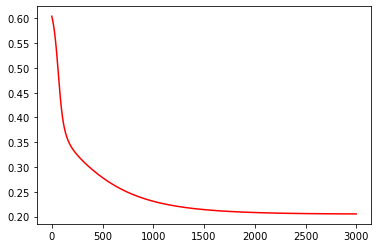

In [120]:
plt.plot(error_tab, c='r', label='sse2', linestyle='-')
plt.show()

In [121]:
Gx = xbb.argmax(axis=1)
print(Gx)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [122]:
X_test = np.array([[2,2],[4,4],[4.5,1.5]])
print(X_test)
xb =  np.c_[np.ones(X_test.shape[0]), X_test]
xbb = xb.dot(v)
f = sigmoid(xbb)
fb = np.c_[np.ones(f.shape[0]), f] #ajout bias
                            ###output layer
z = fb.dot(w)
g = sigmoid(z)

Gx = xbb.argmax(axis=1)
print(Gx)

[[2.  2. ]
 [4.  4. ]
 [4.5 1.5]]
[1 1 1]
